In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")
print(df.head())

                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

**Linear Regression, Random Forest, Gradient Boosting**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["description", "engine", "exterior_color",
                      "interior_color", "name"], errors="ignore")

# Convert numeric columns
for col in ["year", "mileage", "price", "cylinders", "doors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing price
df = df.dropna(subset=["price"])

# Define features and target
y = df["price"]
X = df.drop(columns=["price"])

# Identify numeric and categorical columns
num_cols = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Compute percentage-based accuracy
    accuracy = 100 * np.mean(1 - (abs(y_test - y_pred) / y_test))

    print(f"{name} Accuracy: {accuracy:.2f}%")


Linear Regression Accuracy: 92.59%
Random Forest Accuracy: 92.17%
Gradient Boosting Accuracy: 88.45%


**LIGHTGBM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor  # make sure to install: pip install lightgbm

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["description", "engine", "exterior_color",
                      "interior_color", "name"], errors="ignore")

# Convert numeric columns
for col in ["year", "mileage", "price", "cylinders", "doors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing price
df = df.dropna(subset=["price"])

# Define features and target
y = df["price"]
X = df.drop(columns=["price"])

# Identify numeric and categorical columns
num_cols = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 💪 LightGBM Regressor
lgb_model = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    num_leaves=50,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)

# Full pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", lgb_model)
])

# Train model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Compute % Accuracy
accuracy = 100 * np.mean(1 - (abs(y_test - y_pred) / y_test))
print(f"LightGBM Model Accuracy: {accuracy:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 783, number of used features: 52
[LightGBM] [Info] Start training from score 50193.708812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


**KNN Regressor, Random Forest Regressor,Decision Tree Regressor**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["description", "engine", "exterior_color",
                      "interior_color", "name"], errors="ignore")

# Convert numeric columns
for col in ["year", "mileage", "price", "cylinders", "doors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing price
df = df.dropna(subset=["price"])

# Define features and target
y = df["price"]
X = df.drop(columns=["price"])

# Identify numeric and categorical columns
num_cols = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Models
models = {
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5, weights="distance"),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=500, max_depth=18, min_samples_leaf=2, random_state=42
    ),
    "Decision Tree Regressor": DecisionTreeRegressor(
        max_depth=18, min_samples_leaf=2, random_state=42
    )
}

# Train and evaluate
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calculate percentage-based accuracy
    accuracy = 100 * np.mean(1 - (abs(y_test - y_pred) / y_test))
    print(f"{name} Accuracy: {accuracy:.2f}%")


KNN Regressor Accuracy: 92.55%
Random Forest Regressor Accuracy: 90.80%
Decision Tree Regressor Accuracy: 90.17%


**KNN + Random Forest + Decision Tree → Ridge Regression (Stacking Ensemble)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["description", "engine", "exterior_color",
                      "interior_color", "name"], errors="ignore")

# Convert numeric columns
for col in ["year", "mileage", "price", "cylinders", "doors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing price
df = df.dropna(subset=["price"])

# Define features and target
y = df["price"]
X = df.drop(columns=["price"])

# Identify numeric and categorical columns
num_cols = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# --- Base models ---
base_models = [
    ("knn", KNeighborsRegressor(n_neighbors=5, weights="distance")),
    ("rf", RandomForestRegressor(
        n_estimators=500, max_depth=18, min_samples_leaf=2, random_state=42
    )),
    ("dt", DecisionTreeRegressor(
        max_depth=18, min_samples_leaf=2, random_state=42
    ))
]

# --- Meta model ---
meta_model = RidgeCV(alphas=[0.1, 1.0, 10.0])

# --- Stacking Regressor ---
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    n_jobs=-1
)

# Full pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", stack_model)
])

# Train model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate % accuracy
accuracy = 100 * np.mean(1 - (abs(y_test - y_pred) / y_test))
print(f"Ensemble Model Accuracy: {accuracy:.2f}%")


Ensemble Model Accuracy: 91.79%


**Model Used → Random Forest Regressor (Optimized Parameters)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["description", "engine", "exterior_color",
                      "interior_color", "name"], errors="ignore")

# Convert numeric columns
for col in ["year", "mileage", "price", "cylinders", "doors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing price
df = df.dropna(subset=["price"])

# Features and target
y = df["price"]
X = df.drop(columns=["price"])

# Identify numeric and categorical columns
num_cols = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Optimized Random Forest
rf_model = RandomForestRegressor(
    n_estimators=800,
    max_depth=18,
    min_samples_leaf=2,
    min_samples_split=4,
    random_state=42
)

# Full pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", rf_model)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# % Accuracy
accuracy = 100 * np.mean(1 - (abs(y_test - y_pred) / y_test))
print(f"Optimized Random Forest Accuracy: {accuracy:.2f}%")


Optimized Random Forest Accuracy: 90.76%


**Random Forest + Gradient Boosting + XGBoost → Linear Regression (Stacking Regressor)  Main model**

In [10]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/internshipProject/vehicle_price_prediction/Vehicle Price Prediction/dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["description", "engine", "exterior_color", "interior_color", "name"], errors="ignore")

# Convert numeric columns
for col in ["year", "mileage", "price", "cylinders", "doors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing price
df = df.dropna(subset=["price"])

# Define features and target
y = df["price"]
X = df.drop(columns=["price"])

# Identify numeric and categorical columns
num_cols = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_cols = [c for c in X.columns if c not in num_cols]

# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
base_models = [
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42)),
    ("gb", GradientBoostingRegressor(n_estimators=300, random_state=42)),
    ("xgb", XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
]

# Meta model
meta_model = LinearRegression()

# Stacking model
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

# Full pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", stack_model)
])

# Train
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)
accuracy = 100 * np.mean(1 - (abs(y_test - y_pred) / y_test))
print(f"Stacking Regressor Accuracy: {accuracy:.2f}%")

# ---------------------------------
#  Save trained model
# ---------------------------------
model_path = "/content/drive/MyDrive/internshipProject/vehicle_price_prediction/stacking_vehicle_price_model.pkl"
joblib.dump(pipe, model_path)
print(f"Model saved successfully at: {model_path}")



Stacking Regressor Accuracy: 92.72%
Model saved successfully at: /content/drive/MyDrive/internshipProject/vehicle_price_prediction/stacking_vehicle_price_model.pkl


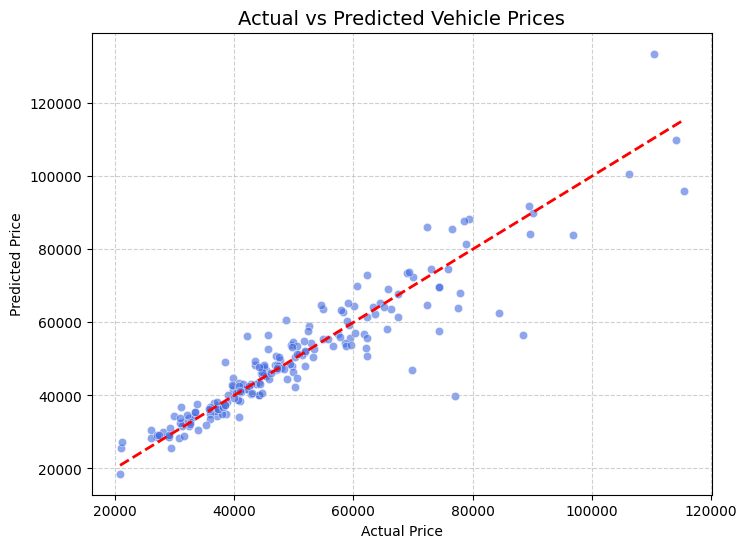

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# --- Scatter Plot: Actual vs Predicted ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Vehicle Prices', fontsize=14)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


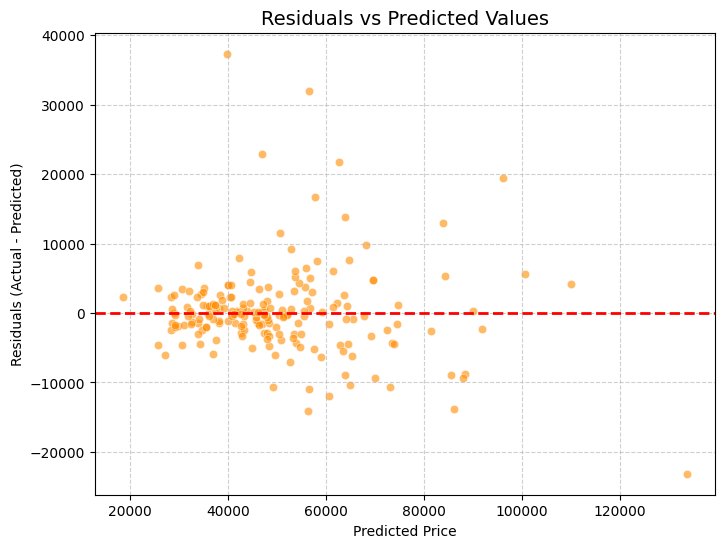

In [6]:

# --- Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='darkorange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


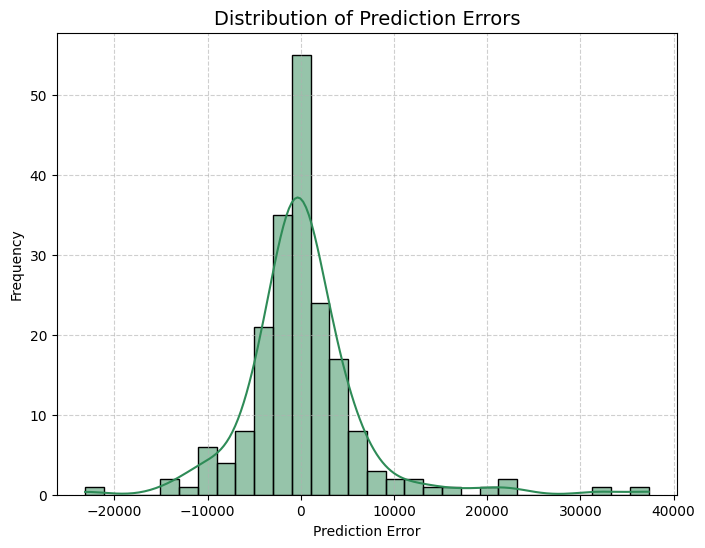

/tmp/ipython-input-505310237.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


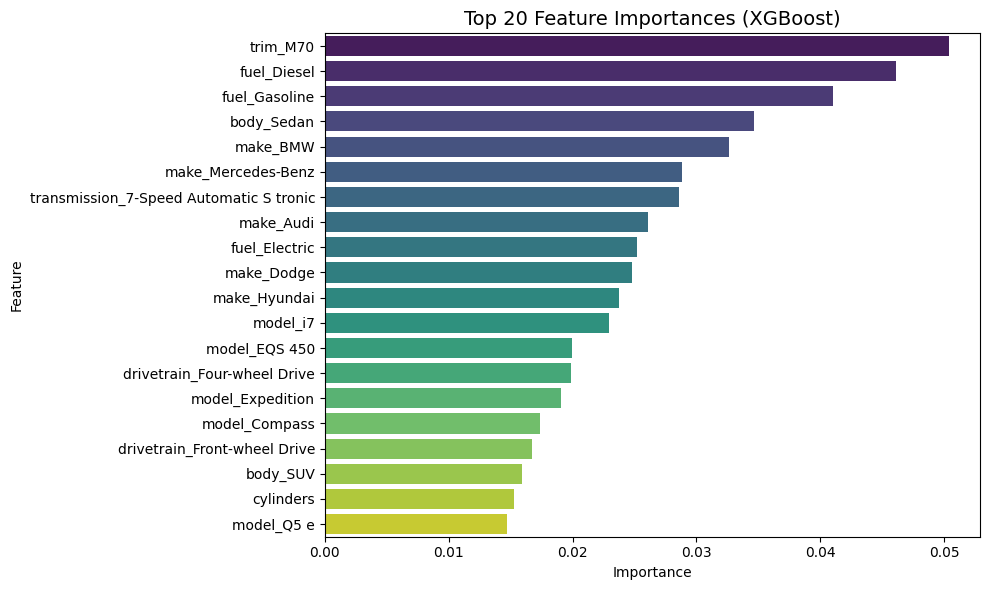

In [7]:

# --- Distribution of Errors ---
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color='seagreen')
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Feature Importance (from Random Forest or XGBoost) ---
# Extract the preprocessor and model
preprocessor = pipe.named_steps['preprocessor']
model = pipe.named_steps['model']

# Get feature names after one-hot encoding
encoded_features = []
if 'num' in preprocessor.named_transformers_:
    encoded_features += num_cols
if 'cat' in preprocessor.named_transformers_:
    cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
    encoded_features += cat_features.tolist()

# Use one base model (e.g., XGBoost) for feature importances
xgb_model = model.named_estimators_['xgb']
importances = xgb_model.feature_importances_

# Create DataFrame for visualization
feat_imp = pd.DataFrame({'Feature': encoded_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Top 20 Feature Importances (XGBoost)', fontsize=14)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
import joblib
import time

# ---------------------------------
# Load the model
# ---------------------------------
model_path = "/content/drive/MyDrive/internshipProject/vehicle_price_prediction/stacking_vehicle_price_model.pkl"
loaded_model = joblib.load(model_path)
print("Model loaded successfully!")

# ---------------------------------
# Function to generate random vehicle data
# ---------------------------------
def generate_random_vehicle():
    data = pd.DataFrame({
        "year": [np.random.choice([2019, 2020, 2021, 2022, 2023, 2024])],
        "mileage": [np.random.randint(0, 100)],  # in thousands
        "cylinders": [np.random.choice([4, 6, 8])],
        "doors": [np.random.choice([2, 4])],
        "fuel": [np.random.choice(["Gasoline", "Diesel", "Electric"])],
        "transmission": [np.random.choice(["Automatic", "Manual", "8-Speed Automatic"])],
        "make": [np.random.choice(["Jeep", "Ford", "Toyota", "BMW", "RAM", "GMC", "Honda", "Tesla"])],
        "model": [np.random.choice(["Wagoneer", "Mustang", "Camry", "Durango", "Yukon", "3500", "Civic"])],
        "trim": [np.random.choice(["Laredo", "Denali", "Laramie", "Series II", "Pursuit"])],
        "body": [np.random.choice(["SUV", "Sedan", "Pickup Truck"])],
        "drivetrain": [np.random.choice(["Four-wheel Drive", "All-wheel Drive"])]
    })
    return data

# ---------------------------------
# Continuous random predictions until KeyboardInterrupt
# ---------------------------------
predictions_list = []

print("Starting random vehicle price predictions...")
print("Press Ctrl + C anytime to stop.\n")

try:
    while True:
        vehicle_data = generate_random_vehicle()
        pred_price = loaded_model.predict(vehicle_data)[0]
        vehicle_data["Predicted_Price"] = round(pred_price, 2)
        vehicle_data["Timestamp"] = pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")

        predictions_list.append(vehicle_data)

        print(vehicle_data)
        print("-" * 60)
        time.sleep(2)  # wait 2 seconds before next prediction

except KeyboardInterrupt:
    print("\nPrediction stopped by user.")

    if predictions_list:
        # Combine all predictions
        final_predictions = pd.concat(predictions_list, ignore_index=True)
        print("\nFinal Predictions Summary:")
        print(final_predictions)

        # Save predictions to CSV
        output_path = "/content/drive/MyDrive/internshipProject/vehicle_price_prediction/real_time_vehicle_predictions.csv"
        final_predictions.to_csv(output_path, index=False)
        print(f"Predictions saved to: {output_path}")
    else:
        print("No predictions were made.")


Model loaded successfully!
Starting random vehicle price predictions...
Press Ctrl + C anytime to stop.

   year  mileage  cylinders  doors      fuel transmission make  model  \
0  2022        8          8      2  Electric       Manual  GMC  Civic   

      trim body       drivetrain  Predicted_Price            Timestamp  
0  Pursuit  SUV  All-wheel Drive         57941.17  2025-10-24 12:58:24  
------------------------------------------------------------
   year  mileage  cylinders  doors    fuel transmission make  model    trim  \
0  2019       89          8      4  Diesel    Automatic  RAM  Yukon  Laredo   

  body       drivetrain  Predicted_Price            Timestamp  
0  SUV  All-wheel Drive         65424.06  2025-10-24 12:58:26  
------------------------------------------------------------
   year  mileage  cylinders  doors    fuel transmission    make model  \
0  2020        1          4      4  Diesel    Automatic  Toyota  3500   

      trim body        drivetrain  Predicted_P